##########################################################
#### File: RattanavilayThip_Weeks_5_&_6_Exercises<br>
#### Name: Thip Rattanavilay<br>
#### Date: 04/24/2021<br>
#### Course: DSC 540 - Assignment: Weeks 5 & 6 Exercises<br>
##########################################################

Complete the following exercises. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

1. Data Wrangling with Python: Activity 7, page 207

2. Data Wrangling with Python: Activity 8, page 233

3. Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

# Activity 7: Reading Tabular Data from a Web Page and Creating DataFrames


In this activity, you have been given a Wikipedia page where you have the GDP of all countries listed. You have been asked to create three DataFrames from the three sources mentioned in the page (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)):

1) **Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure**

![title](inspect_element.png)

2) **Read the page using bs4**

In [1]:
# import libraries 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# importing the data using bs4
url="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).content

# Parse the html content
soup = BeautifulSoup(html_content)

3) **Find the table structure you will need to deal with (how many tables there are?)**

In [3]:
# Find the wikitable 
table = soup.find("table", attrs={"class": "wikitable"})
table_data = table.tbody.find_all("tr")

# Get the headings of the tables so we can use them in our charts
headings = []
for td in table_data[0].find_all("td"):
    headings.append(td.b.text.replace('\n', ' ').strip())

headings

['Per the International Monetary Fund (2020 estimates)',
 'Per the World Bank (2019)',
 'Per the United Nations (2019)']

4) **Find the right table using bs4** 

There are three different tables, so each one needs to be processed individually

5) **Separate the source names and their corresponding data**

In [4]:
# separeting the source names and corresponding data
data = dict()
for table, heading in zip(table_data[1].find_all("table"), headings):
    
    # Get headers of each table
    t_headers = []
    for th in table.find_all("th"):
        # remove any newlines and extra spaces from left and right
        t_headers.append(th.text.replace('\n', '').strip())
    # Get all the rows of table
    table_data = []
    for tr in table.tbody.find_all("tr"): # find all tr's from table's tbody
        t_row = {}
        # Each table row is stored in the form of
        # find all td's(3) in tr and zip it with t_header
        for td, th in zip(tr.find_all("td"), t_headers): 
            # Regex to remove citation brackets and contents
            t_row[th] = re.sub(r'\[[^\]]*\]',"",td.text.replace('\n', '').strip()).replace(',','')
        table_data.append(t_row)

    data[heading] = table_data

In [5]:
# definding the string 
def year_brackets(string):
    """Removes parentheses and contexts from a string (needed for index matching)"""
    return re.sub(r'\([^)]*\)', '', string).strip()

In [6]:
# definding the dataframe to df1 and print our ranks, country and GDP
df1 = pd.DataFrame(data[headings[0]][2:])

print(headings[1])

df1['Country/Territory'] = df1['Country/Territory'].apply(year_brackets)
df1

Per the World Bank (2019)


,Rank,Country/Territory,GDP(US$million)
0,1,United States,20807269
1,2,China,14860775
2,3,Japan,4910580
3,4,Germany,3780553
4,5,United Kingdom,2638296
...,...,...,...
190,191,Marshall Islands,225
191,192,Kiribati,194
192,193,Nauru,114
193,194,Tuvalu,45


In [7]:
# definding the dataframe to df2 and print our ranks, country and GDP

df2 = pd.DataFrame(data[headings[1]][2:])

print(headings[1])
df2['Country/Territory'] = df2['Country/Territory'].apply(year_brackets)
df2

Per the World Bank (2019)


,Rank,Country/Territory,GDP(US$million)
0,1,United States,21427700
1,2,China,14342903
2,3,Japan,5081770
3,4,Germany,3845630
4,5,India,2875142
...,...,...,...
185,188,Palau,284
186,189,Marshall Islands,221
187,190,Kiribati,195
188,191,Nauru,118


In [8]:
# definding the dataframe to df3 and print our ranks, country and GDP

df3 = pd.DataFrame(data[headings[2]][2:])
print(headings[2])
df3['Country/Territory'] = df3['Country/Territory'].apply(year_brackets)

df3

Per the United Nations (2019)


,Rank,Country/Territory,GDP(US$million)
0,1,United States,21433226
1,2,China,14342933
2,3,Japan,5082465
3,4,Germany,3861123
4,5,India,2891582
...,...,...,...
207,209,Marshall Islands,237
208,210,Kiribati,194
209,211,Nauru,132
210,212,Montserrat,67


In [9]:
# Merging all the dataframes together based on country
# how = "right" ensures that any countries not previous in the dataframe are added and previous values are NaN

df = pd.merge(df1, df2, how="right", on=["Country/Territory"])
df = pd.merge(df, df3, how="right", on=["Country/Territory"])

# Dropping the ranks since we can sort it however we want now
df = df.drop(['Rank_x','Rank_y','Rank'], axis = 1)

# Adding the corresponding headings
df.columns = ["Country/Territory"] + headings

# Forcing all the values to be numeric and NaN since some are N/A which causes issues when attempting to plot
df[df.columns[1:4]] = df[df.columns[1:4]].apply(pd.to_numeric, errors='coerce')

df

,Country/Territory,Per the International Monetary Fund (2020 estimates),Per the World Bank (2019),Per the United Nations (2019)
0,United States,20807269.0,21427700.0,21433226.0
1,China,14860775.0,14342903.0,14342933.0
2,Japan,4910580.0,5081770.0,5082465.0
3,Germany,3780553.0,3845630.0,3861123.0
4,India,2592583.0,2875142.0,2891582.0
...,...,...,...,...
207,Marshall Islands,225.0,221.0,237.0
208,Kiribati,194.0,195.0,194.0
209,Nauru,114.0,118.0,132.0
210,Montserrat,NaN,NaN,67.0


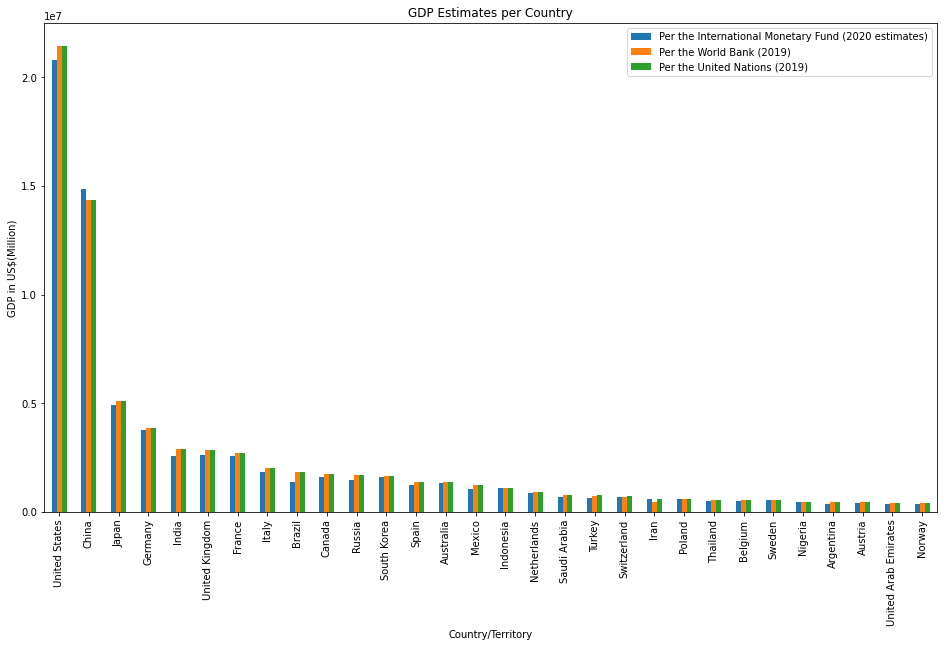

In [10]:
# Plotting the data
df.head(30).plot(kind="bar", x=df.columns[0], figsize = (16,9))
plt.title("GDP Estimates per Country")
plt.ylabel("GDP in US$(Million)")
plt.show()

# Activity 8: Handling Outliers and Missing Data
In this activity, we will identify and get7 rid of outliers. Here, we have a CSV file. THe goal here is to clean the data by using the knowledge that we have learned about so far and come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data. 

The steps that will help you solve this activity are as follows:
1) **Read the `visit_data.csv` file.**

In [11]:
# Importing the data
df = pd.read_csv("visit_data.csv",index_col="id")
df

,first_name,last_name,email,gender,ip_address,visit
id,,,,,,
1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...
996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN


2) **Check for duplicates**

In [12]:
# Checking to see if there are any duplicated names
full_name = df['first_name'] + " "+df['last_name']
full_name.value_counts(dropna=True).sort_values(ascending=False)

Shandie Tuxell            1
Joyann Moyce              1
Nikolia Eatock            1
Bartolomeo Crosthwaite    1
Aarika Baldcock           1
                         ..
Dew Tow                   1
Cam Maudson               1
Eveline Larcier           1
Read Turone               1
Whitney Youell            1
Length: 704, dtype: int64

In [13]:
# Checking if there are any duplicated emails
df['email'].value_counts(dropna=True).sort_values(ascending=False)

dszymonwicz5i@chron.com         1
geastridge4w@stumbleupon.com    1
mtootin5u@scribd.com            1
tjeppfn@flickr.com              1
sslevin96@gov.uk                1
                               ..
nmacilriachc2@omniture.com      1
fheelisl4@forbes.com            1
aseager8g@dagondesign.com       1
elombardk3@geocities.jp         1
apickoverrn@vk.com              1
Name: email, Length: 1000, dtype: int64

In [14]:
# Checking if there are duplicated visits
df['visit'].value_counts(dropna=True).sort_values(ascending=False)

433.0     4
732.0     3
365.0     3
900.0     3
2231.0    3
         ..
1095.0    1
2446.0    1
1007.0    1
1466.0    1
1813.0    1
Name: visit, Length: 835, dtype: int64

In [15]:
# Checking if there are duplicated IP addresses
df['ip_address'].value_counts(dropna=True).sort_values(ascending=False)

151.186.213.148    1
32.242.11.185      1
13.75.154.191      1
145.84.189.26      1
33.32.239.61       1
                  ..
234.174.140.56     1
18.101.161.203     1
105.3.131.115      1
190.249.154.17     1
7.152.206.163      1
Name: ip_address, Length: 1000, dtype: int64

In [16]:
# General check to see if any rows are duplicated
df[df.duplicated()]

,first_name,last_name,email,gender,ip_address,visit
id,,,,,,


3) **Check if any essential columns contain NaN.**

In [17]:
# Several rows contain NaN values, mostly in the first/last name and gender with a handful missing the number of visits
df[df.isna().any(axis=1)]

,first_name,last_name,email,gender,ip_address,visit
id,,,,,,
2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
6,Raymund,Ingerfield,ringerfield5@microsoft.com,NaN,90.100.118.215,451.0
...,...,...,...,...,...,...
995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN


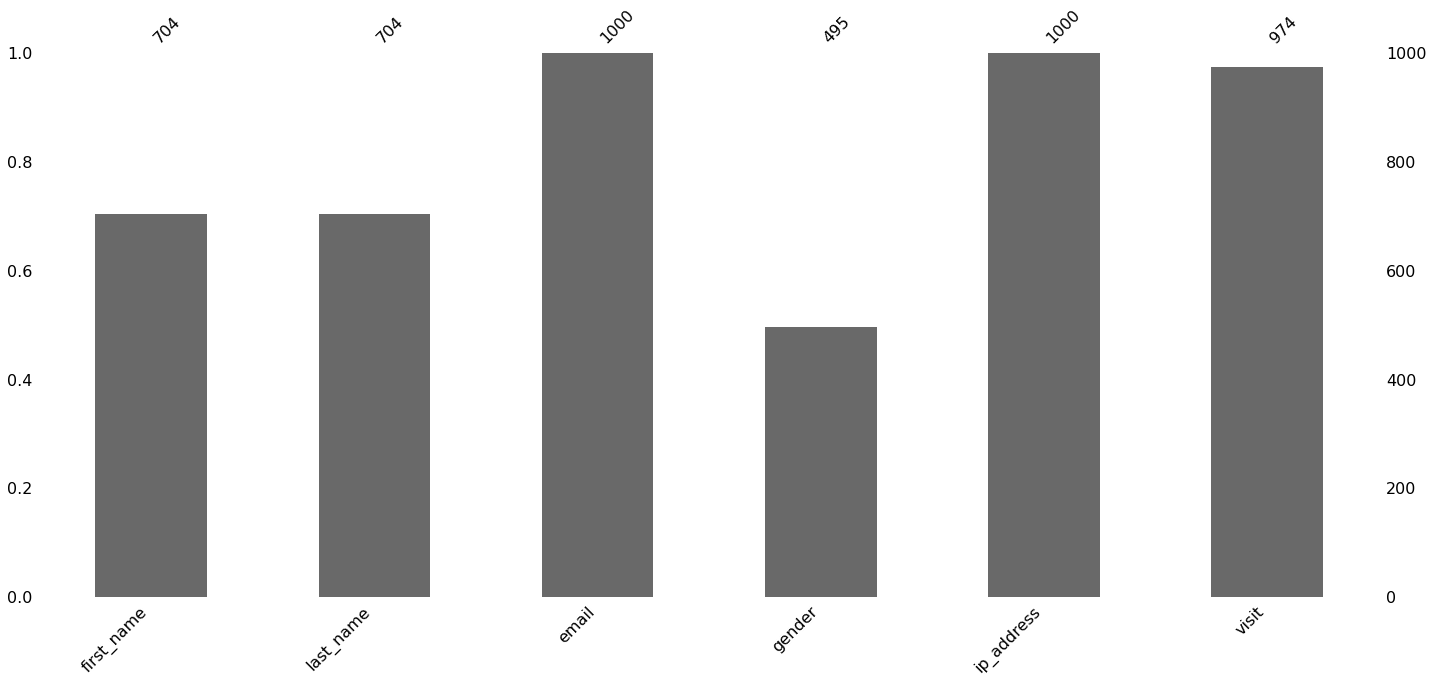

In [18]:
# import missingno 
import missingno as mn
mn.bar(df);

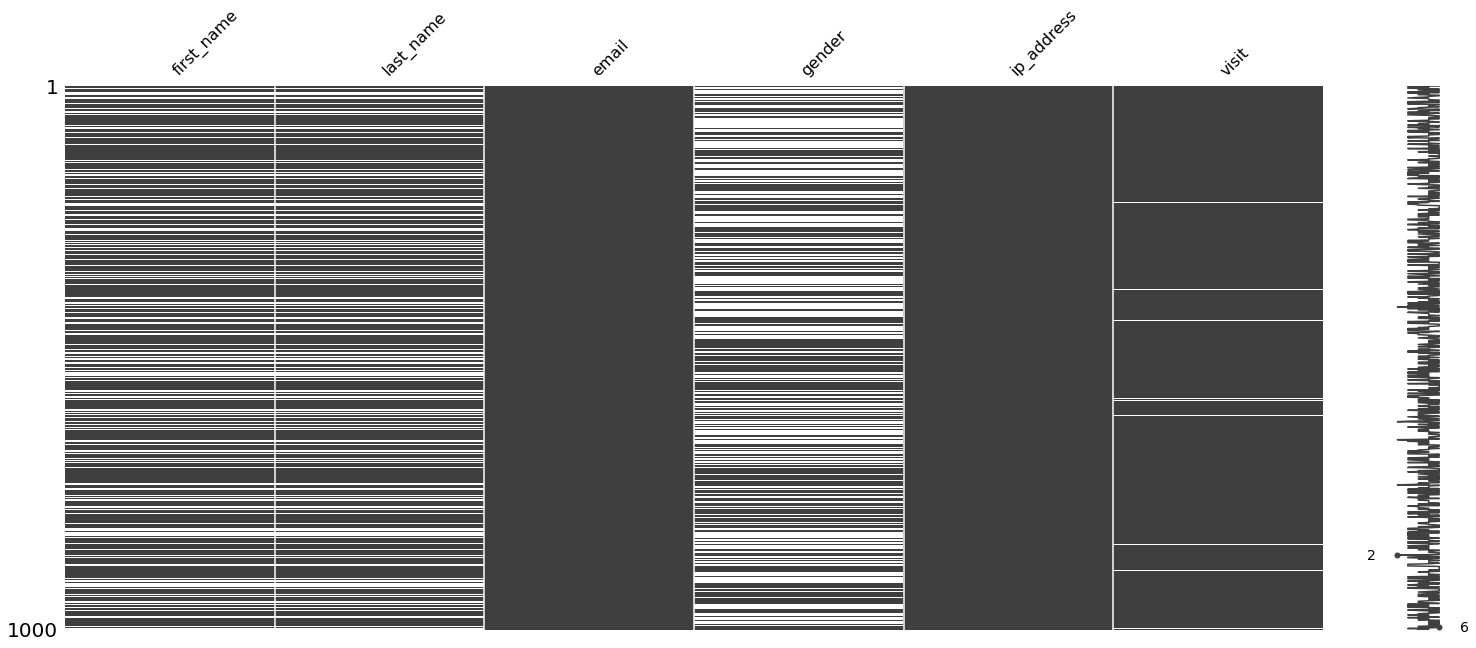

In [19]:
# Display MN dataframe 
mn.matrix(df);

4) **Get rid of the outliers**

There is no guidence to determine what is an outlier, so I'll just remove rows that have multiple NaN values and have no information on visits since that seems to be the target attribute for this dataset

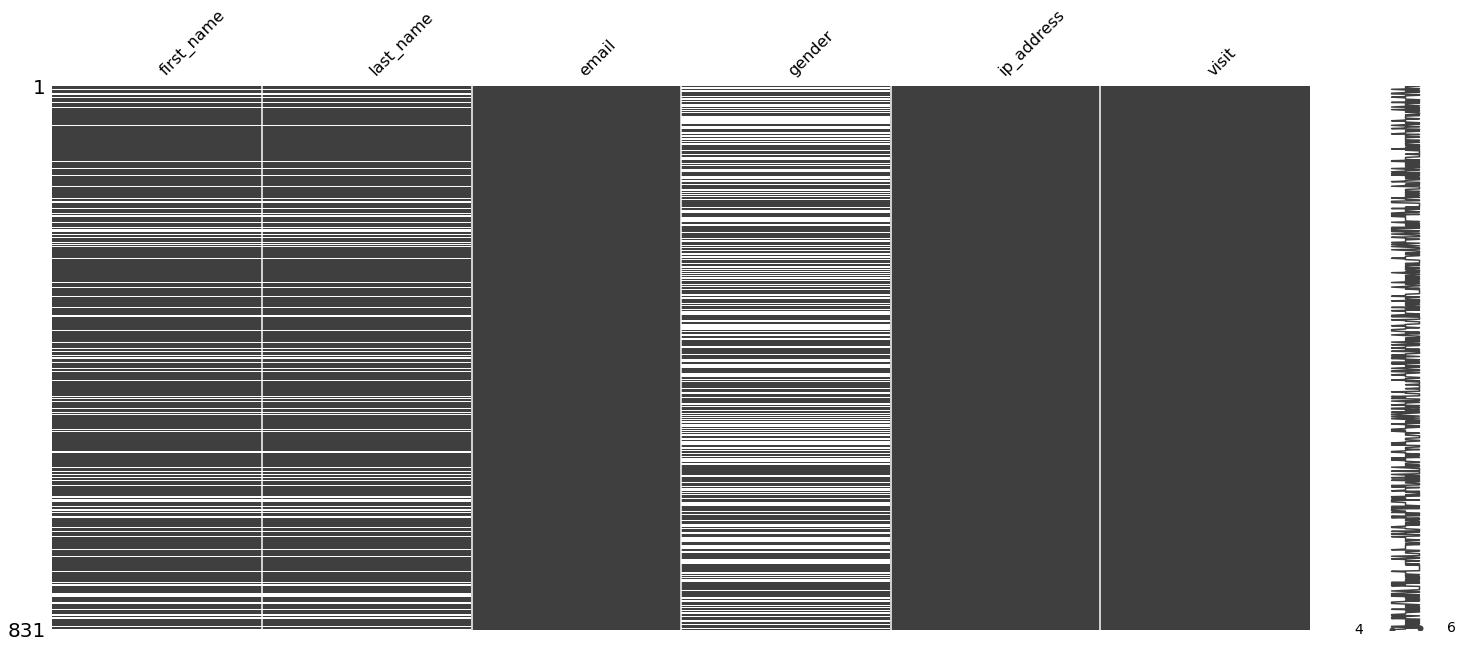

In [20]:
# Cleaned data with first name, last name and gender
df_cleaned = df.dropna(subset=["first_name","last_name","gender"], how='all')
df_cleaned = df_cleaned.dropna(subset=['visit'], how='all')
df_cleaned
mn.matrix(df_cleaned);

5) **Report the size difference**


In [21]:
# print Out of 1000 rows, 169 have been dropped due to too many NaN values
print("Out of {} rows, {} have been dropped due to too many NaN values.".format(len(df), len(df) - len(df_cleaned)))

Out of 1000 rows, 169 have been dropped due to too many NaN values.


6) **Create a boxplot to check for outliers**

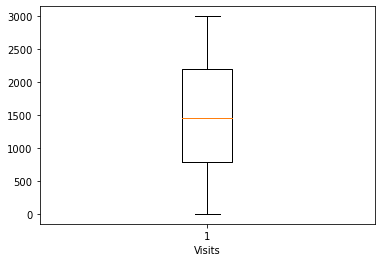

In [22]:
# Create a boxplot for to check outliers
plt.boxplot(df_cleaned['visit'])
plt.xlabel("Visits")
plt.show()

_addendum_ this data doesn't seem to contain any outliers, and it looks like these "visits" are some continuous data variable.

7) **Get rid of any outliers**

Dropping values lower than the 5% percentile range and values greater than the 95% percentile range

In [23]:
# used the cleaned df and dropped values lower than 5% and values greater than 95%
df_cleaned[(df_cleaned['visit'] > np.percentile(df_cleaned['visit'], 5)) & 
           (df_cleaned['visit'] < np.percentile(df_cleaned['visit'], 95))]

,first_name,last_name,email,gender,ip_address,visit
id,,,,,,
1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
6,Raymund,Ingerfield,ringerfield5@microsoft.com,NaN,90.100.118.215,451.0
7,Wilhelmina,Dagnan,wdagnan6@nytimes.com,Female,88.133.77.243,1540.0
...,...,...,...,...,...,...
995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0


# #3 Insert data into a SQL Lite database 

a. **Name, Address, City, State, Zip, Phone Number**

In [24]:
# Creating the name data

names = ['Albert Einstein', 
         'Marie Curie', 
         'Isaac Newton', 
         'Rosalind Franklin', 
         'Thomas Edison', 
         'Charles Darwin', 
         'Enrico Fermi', 
         'Max Planck', 
         'Edwin Hubble',
         'Alan Turing']

In [25]:
# Creating the address data

addresses = ["112 Mercer St", 
           "16 Freta Street", 
           "Woolsthorpe Manor, Water Ln", 
           "107 Drayton Gardens", 
           "729 E Washington St", 
           "Down House Luxted Road",
           "5537 South Woodlawn Avenue",
           "Max-Planck-Ring 6", 
           "1340 Woodstock Road", 
           "2 Warrington Crescent"]

In [26]:
# Creating the cities data

cities = ['Princeton', 
        'Warsaw', 
        'Grantham', 
        'London', 
        'Louisville', 
        'Downe',
        'Chicago',
        'Ilmenau',
        'San Marino',
        'London']

In [27]:
# Creating the states data

states = ['New Jersey', 
         'Poland' , 
         'England', 
         'England', 
         'Kentucky', 
         'England', 
         'Illinois', 
         "Germany", 
         "California", 
         "England"]

In [28]:
# Creating the zipcodes data

zipcodes = ['08540', 
            '00-227', 
            'NG31', 
            'SW10', 
            '40202', 
            'BR6 7JT', 
            '60637', 
            '98693', 
            '91108', 
            'W9 1ER']

In [29]:
# Creating the phone numbers data

phone_numbers = ['+1-609-921-6748', 
                 '+48-22-831-80-92' , 
                 '+44 1476 860338', 
                 '01235-395000', 
                 '+1-502-585-5247',
                 '+44-370-333-1181', 
                 '+39 06 4550 2901', 
                 '+49-7071-601765', 
                 '+1-626-692-7274', 
                 '+44-203-862-3352']

In [30]:
# using panadas for the dataframe

pd.DataFrame(zip(names, 
                 addresses, 
                 cities, 
                 states, 
                 zipcodes, 
                 phone_numbers), 
             columns=['Name',
                      'Address',
                      'City',
                      'State/Country',
                      'Zipcode',
                      'Telephone']) 

,Name,Address,City,State/Country,Zipcode,Telephone
0,Albert Einstein,112 Mercer St,Princeton,New Jersey,08540,+1-609-921-6748
1,Marie Curie,16 Freta Street,Warsaw,Poland,00-227,+48-22-831-80-92
2,Isaac Newton,"Woolsthorpe Manor, Water Ln",Grantham,England,NG31,+44 1476 860338
3,Rosalind Franklin,107 Drayton Gardens,London,England,SW10,01235-395000
4,Thomas Edison,729 E Washington St,Louisville,Kentucky,40202,+1-502-585-5247
5,Charles Darwin,Down House Luxted Road,Downe,England,BR6 7JT,+44-370-333-1181
6,Enrico Fermi,5537 South Woodlawn Avenue,Chicago,Illinois,60637,+39 06 4550 2901
7,Max Planck,Max-Planck-Ring 6,Ilmenau,Germany,98693,+49-7071-601765
8,Edwin Hubble,1340 Woodstock Road,San Marino,California,91108,+1-626-692-7274
9,Alan Turing,2 Warrington Crescent,London,England,W9 1ER,+44-203-862-3352



b. **Add at least 10 rows of data and submit your code with a query generating your results.**

In [31]:
# import sqlite3
import sqlite3

# Connecting to sqlite
conn = sqlite3.connect('my_database.db')

# Creating a cursor object using the cursor() method
cursor = conn.cursor()

# Droping USERS table if already exists.
cursor.execute("DROP TABLE IF EXISTS USERS")

# Creating table as per requirement
sql ='''CREATE TABLE USERS(
   NAME,
   ADDRESS,
   CITY,
   STATE,
   ZIPCODE,
   PHONE)'''

cursor.execute(sql)

# Adding the data to sqlite
for name, address, city, state, zipcode, phone_number in zip(names, addresses, cities, states, zipcodes, phone_numbers):
    cursor.execute('''INSERT INTO USERS(NAME, ADDRESS, CITY, STATE, ZIPCODE, PHONE) VALUES(?,?,?,?,?,?)''', 
                   [name, address, city, state, zipcode, phone_number])

    
# Commit the changes in the database
conn.commit()

In [32]:
# Pulling all values from the USERS table
cursor.execute("SELECT * FROM USERS")
cursor.fetchall()

[('Albert Einstein',
  '112 Mercer St',
  'Princeton',
  'New Jersey',
  '08540',
  '+1-609-921-6748'),
 ('Marie Curie',
  '16 Freta Street',
  'Warsaw',
  'Poland',
  '00-227',
  '+48-22-831-80-92'),
 ('Isaac Newton',
  'Woolsthorpe Manor, Water Ln',
  'Grantham',
  'England',
  'NG31',
  '+44 1476 860338'),
 ('Rosalind Franklin',
  '107 Drayton Gardens',
  'London',
  'England',
  'SW10',
  '01235-395000'),
 ('Thomas Edison',
  '729 E Washington St',
  'Louisville',
  'Kentucky',
  '40202',
  '+1-502-585-5247'),
 ('Charles Darwin',
  'Down House Luxted Road',
  'Downe',
  'England',
  'BR6 7JT',
  '+44-370-333-1181'),
 ('Enrico Fermi',
  '5537 South Woodlawn Avenue',
  'Chicago',
  'Illinois',
  '60637',
  '+39 06 4550 2901'),
 ('Max Planck',
  'Max-Planck-Ring 6',
  'Ilmenau',
  'Germany',
  '98693',
  '+49-7071-601765'),
 ('Edwin Hubble',
  '1340 Woodstock Road',
  'San Marino',
  'California',
  '91108',
  '+1-626-692-7274'),
 ('Alan Turing',
  '2 Warrington Crescent',
  'London',

In [33]:
# Pulling data for Marie Curie and all users from London
cursor.execute("SELECT * FROM USERS WHERE NAME = 'Marie Curie' OR CITY = 'London'")
cursor.fetchall()

[('Marie Curie',
  '16 Freta Street',
  'Warsaw',
  'Poland',
  '00-227',
  '+48-22-831-80-92'),
 ('Rosalind Franklin',
  '107 Drayton Gardens',
  'London',
  'England',
  'SW10',
  '01235-395000'),
 ('Alan Turing',
  '2 Warrington Crescent',
  'London',
  'England',
  'W9 1ER',
  '+44-203-862-3352')]

In [34]:
# Closing the connection
conn.close()